Donald Stegman  Project 1 Group 2  YELP  =]

In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# File to Load (Remember to Change These)
file_to_load = "yelp_data.csv"

# Read Purchasing File and store into Pandas data frame
yelp_data = pd.read_csv(file_to_load, low_memory=False)
#yelp_data.head(15)

In [2]:
yelp_data.head()

,address,attributes,attributes.AcceptsInsurance,attributes.AgesAllowed,attributes.Alcohol,attributes.Ambience,attributes.BYOB,attributes.BYOBCorkage,attributes.BestNights,attributes.BikeParking,...,hours.Tuesday,hours.Wednesday,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,2818 E Camino Acequia Drive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,33.522143,-112.018481,Arizona Biltmore Golf Club,85016,5,3.0,AZ
1,30 Eglinton Avenue W,NaN,NaN,NaN,u'full_bar',"{'romantic': False, 'intimate': False, 'classy...",NaN,NaN,NaN,False,...,9:0-0:0,9:0-0:0,1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
2,"10110 Johnston Rd, Ste 15",NaN,NaN,NaN,u'beer_and_wine',"{'romantic': False, 'intimate': False, 'touris...",NaN,NaN,NaN,True,...,NaN,17:30-21:30,1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
3,"15655 W Roosevelt St, Ste 237",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8:0-17:0,8:0-17:0,1,33.455613,-112.395596,Farmers Insurance - Paul Lorenz,85338,3,5.0,AZ
4,"4209 Stuart Andrew Blvd, Ste F",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7:0-23:0,7:0-23:0,1,35.190012,-80.887223,Queen City Plumbing,28217,4,4.0,NC


In [3]:
yelp_data.columns

Index(['address', 'attributes', 'attributes.AcceptsInsurance',
       'attributes.AgesAllowed', 'attributes.Alcohol', 'attributes.Ambience',
       'attributes.BYOB', 'attributes.BYOBCorkage', 'attributes.BestNights',
       'attributes.BikeParking', 'attributes.BusinessAcceptsBitcoin',
       'attributes.BusinessAcceptsCreditCards', 'attributes.BusinessParking',
       'attributes.ByAppointmentOnly', 'attributes.Caters',
       'attributes.CoatCheck', 'attributes.Corkage',
       'attributes.DietaryRestrictions', 'attributes.DogsAllowed',
       'attributes.DriveThru', 'attributes.GoodForDancing',
       'attributes.GoodForKids', 'attributes.GoodForMeal',
       'attributes.HairSpecializesIn', 'attributes.HappyHour',
       'attributes.HasTV', 'attributes.Music', 'attributes.NoiseLevel',
       'attributes.Open24Hours', 'attributes.OutdoorSeating',
       'attributes.RestaurantsAttire', 'attributes.RestaurantsCounterService',
       'attributes.RestaurantsDelivery', 'attributes.Restau

In [ ]:
#bad_states = ['AB', 'BAS', 'BC', 'CON', 'DOW', 'DUR', 'ON', 'QC', 'XGL', 'XGM', 'XWY']
#yelp_data2 = yelp_data
#for state in bad_states:
#    yelp_data2 = yelp_data2[yelp_data.state != state]
#yelp_data2.state.count()

In [4]:
yelp_data.state.count()

192609

In [ ]:
#yelp_data2.state.count()

In [6]:
price_range = yelp_data['attributes.RestaurantsPriceRange2'].value_counts()
price_range

2       61506
1       33859
3       10462
4        2255
None       97
Name: attributes.RestaurantsPriceRange2, dtype: int64

In [7]:
yelp_data['categories'].value_counts()

Restaurants, Pizza                                                                                                                                                             1042
Nail Salons, Beauty & Spas                                                                                                                                                     1031
Pizza, Restaurants                                                                                                                                                              993
Beauty & Spas, Nail Salons                                                                                                                                                      947
Food, Coffee & Tea                                                                                                                                                              888
                                                                                                    

In [ ]:
category = yelp_data['categories'].unique()
category

In [20]:
state_prices = yelp_data['attributes.RestaurantsPriceRange2']
state_prices.head()

0    NaN
1      2
2      2
3    NaN
4    NaN
Name: attributes.RestaurantsPriceRange2, dtype: object

In [21]:
states = yelp_data['state']
states.head()

0    AZ
1    ON
2    NC
3    AZ
4    NC
Name: state, dtype: object

In [23]:
state_price_df = pd.DataFrame()
state_price_df['price_range'] = state_prices.values
state_price_df['states'] = states

#state_prices.price_range.groupby('state').value_counts()
state_price_clean_df = state_price_df.dropna(how='any')
state_price_clean_df.head()

,price_range,states
1,2,ON
2,2,NC
5,2,ON
6,2,AB
7,3,NV


In [24]:
len(state_price_clean_df)

108179

In [37]:
state_price_clean_df.price_range.value_counts()

2       61506
1       33859
3       10462
4        2255
None       97
Name: price_range, dtype: int64

In [35]:
state_price_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108179 entries, 1 to 192608
Data columns (total 2 columns):
price_range    108179 non-null object
states         108179 non-null object
dtypes: object(2)
memory usage: 7.5+ MB


In [38]:
state_price_clean_df = state_price_clean_df[state_price_clean_df.price_range != "None"]
state_price_clean_df["price_range"] = state_price_clean_df["price_range"].apply(pd.to_numeric)
state_price_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108082 entries, 1 to 192608
Data columns (total 2 columns):
price_range    108082 non-null int64
states         108082 non-null object
dtypes: int64(1), object(1)
memory usage: 2.5+ MB


In [47]:
state_price_clean_df = state_price_clean_df.groupby("states")

In [78]:
state_price_mean = state_price_clean_df.price_range.mean()
state_price_mean_df = pd.DataFrame(state_price_mean).reset_index()
state_price_mean_df

,states,price_range
0,AB,2.027519
1,AK,2.000000
2,AL,2.000000
3,AR,1.000000
4,AZ,1.754916
5,BAS,1.000000
6,BC,2.000000
7,CA,1.714286
8,CT,3.000000
9,FL,1.000000


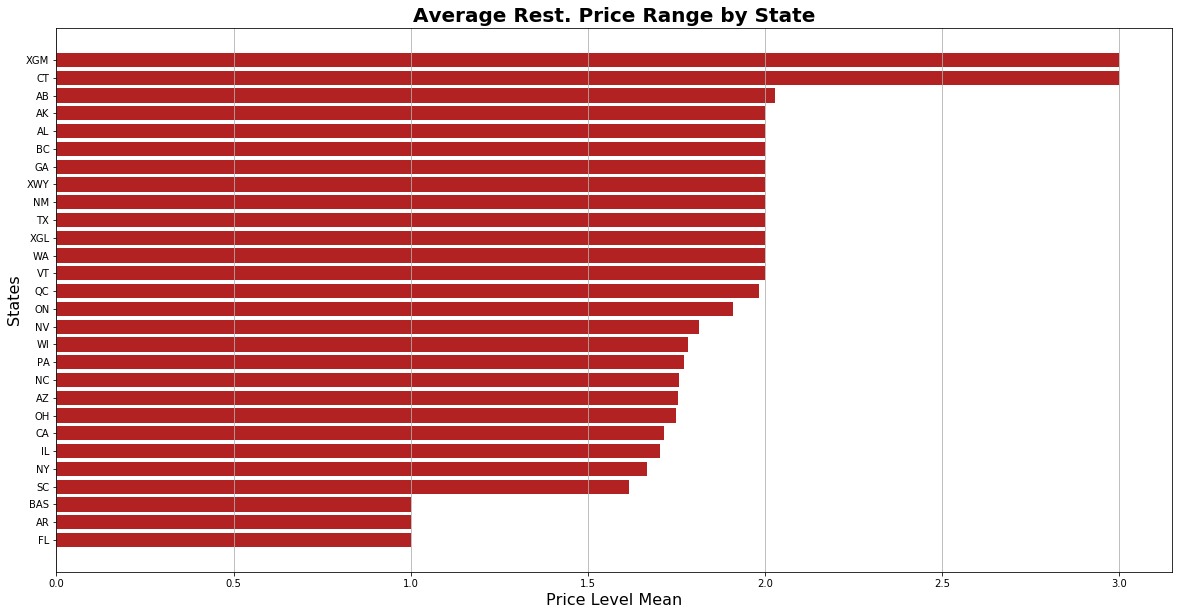

In [85]:
#catGroups = yelp_data.groupby("state")[category].sum().reset_index()
state_price_mean_sort = state_price_mean_df.sort_values('price_range', ascending=True).reset_index(drop=True)

#plot
%matplotlib inline

plt.figure(figsize=(20,10))

plt.barh( state_price_mean_sort.states, state_price_mean_sort['price_range'], color="firebrick")


plt.title("Average Rest. Price Range by State", weight="bold", fontsize=20)
plt.ylabel("States", fontsize=16)
plt.xlabel("Price Level Mean", fontsize=16)

plt.grid(axis='x')

plt.savefig("avgRest_price.png")


plt.show()

In [88]:
rest_prices = yelp_data['attributes.RestaurantsPriceRange2']
len(rest_prices)

192609

In [89]:
rest_review_count = yelp_data['review_count']
len(rest_review_count)

192609

In [92]:
rest_price_df = pd.DataFrame()
rest_price_df['rest_prices'] = rest_prices.values
rest_price_df['rest_review_count'] = rest_review_count.values
rest_price_df = rest_price_df[rest_price_df.rest_prices != "None"]
rest_price_df["rest_prices"] = rest_price_df["rest_prices"].apply(pd.to_numeric)
rest_price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192512 entries, 0 to 192608
Data columns (total 2 columns):
rest_prices          108082 non-null float64
rest_review_count    192512 non-null int64
dtypes: float64(1), int64(1)
memory usage: 4.4 MB


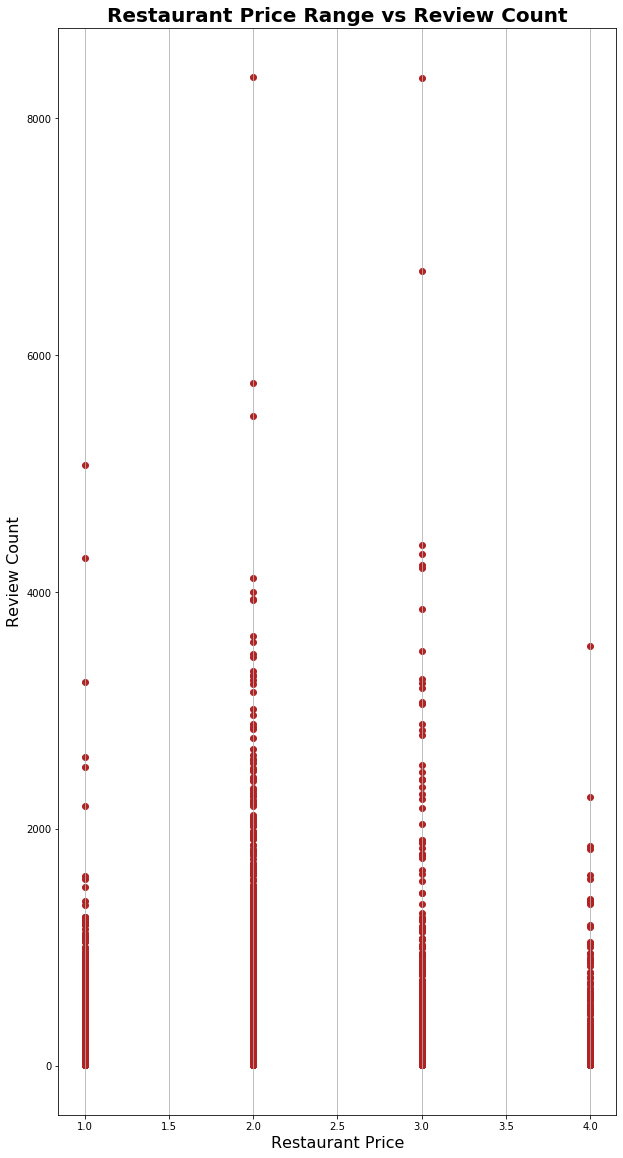

In [101]:

rest_price_df = rest_price_df.sort_values('rest_prices', ascending=True).reset_index(drop=True)

#plot
%matplotlib inline

plt.figure(figsize=(10,20))

plt.scatter(rest_price_df['rest_prices'], rest_price_df.rest_review_count, color="firebrick")


plt.title("Restaurant Price Range vs Review Count", weight="bold", fontsize=20)
plt.ylabel("Review Count", fontsize=16)
plt.xlabel("Restaurant Price", fontsize=16)

plt.grid(axis='x')

plt.savefig("Rest_priceVSreview_count.png")


plt.show()

In [95]:
rest_price_clean_df = rest_price_df.dropna(how='any')
rest_price_clean_df = rest_price_clean_df.sort_values('rest_prices', ascending=True).reset_index(drop=True)

In [96]:
rest_price_clean_df.corr()

,rest_prices,rest_review_count
rest_prices,1.000000,0.030923
rest_review_count,0.030923,1.000000


In [97]:
import seaborn as sns

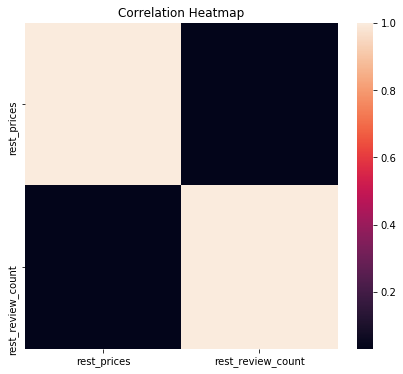

In [115]:
fig, ax = plt.subplots(figsize=(7,6))
ax = sns.heatmap(rest_price_clean_df.corr())
ax.set_title('Correlation Heatmap')
plt.savefig('Correlation_Heatmap.png')
plt.show()

In [99]:
import statsmodels.api as sm

In [121]:
import random

rest_price_clean_df["LOL"] = [random.randint(0,100) for x in range(len(rest_price_clean_df))]

In [122]:
X = rest_price_clean_df[["rest_prices", "LOL"]]
y = rest_price_clean_df["rest_review_count"]
X = sm.add_constant(X)

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      rest_review_count   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     51.75
Date:                Sat, 05 Oct 2019   Prob (F-statistic):           3.43e-23
Time:                        13:17:47   Log-Likelihood:            -6.8902e+05
No. Observations:              108082   AIC:                         1.378e+06
Df Residuals:                  108079   BIC:                         1.378e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          37.3283      1.439     25.934      0.000      34.507      40.149
rest_prices     6.4574      0.635     10.170      0.000       5.213       7.702
LOL             0.0034      0.015      0.228      0.819      -0.026       0.032
==============================================================================
Omnibus:                   213673.044   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1086738008.014
Skew:                          15.739   Prob(JB):                         0.00
Kurtosis:                     493.228   Cond. No.                         206.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

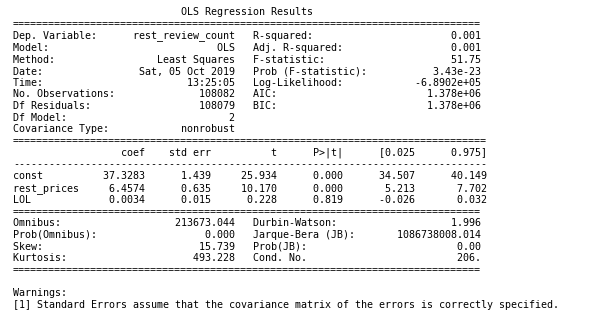

In [128]:
#X = rest_price_clean_df["rest_prices"]
#y = rest_price_clean_df["rest_review_count"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model


plt.rc('figure', figsize=(9, 5))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('output.png')

    Ha
    R-squared is 0.101
    P value is 0.
    Therefore, do not reject the null hypothesis.